In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
 # Step 1: Load and preprocess the data
data = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls") 

In [18]:
data

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [19]:
# Step 2: Preprocessing
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
# Sort the data by date
data = data.sort_values('Date')

In [21]:
# Handle missing values
data = data.dropna()

In [22]:
# Convert negative prices to positive
data['Price'] = data['Price'].abs()

# Step: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Price'] = scaler.fit_transform(data[['Price']])

In [23]:
# Step 3: Split the data into train and test sets
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Step 4: Create and fit the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [25]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Step 6: Calculate and print the model's accuracy
mse = mean_squared_error(y_test, y_pred)
accuracy = 100 - np.sqrt(mse)
print('Model Accuracy:', accuracy)

Model Accuracy: 99.8769200255917


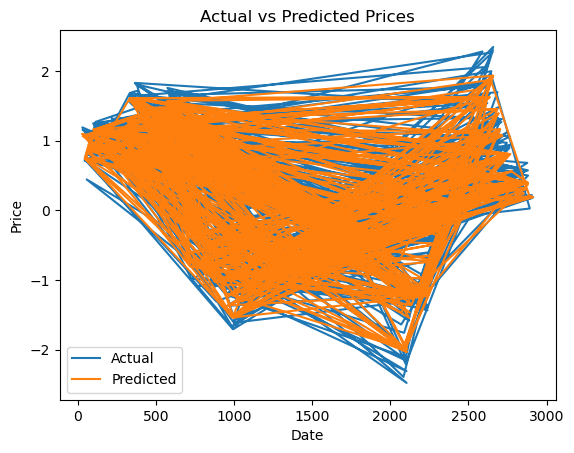

In [27]:
# Step 7: Plot the predicted prices against the actual prices
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

In [28]:
# Step 8: Future price prediction
future_dates = pd.date_range(start=data['Date'].max(), periods=30, freq='D')
future_prices = model.predict(pd.DataFrame({'Date': future_dates}))

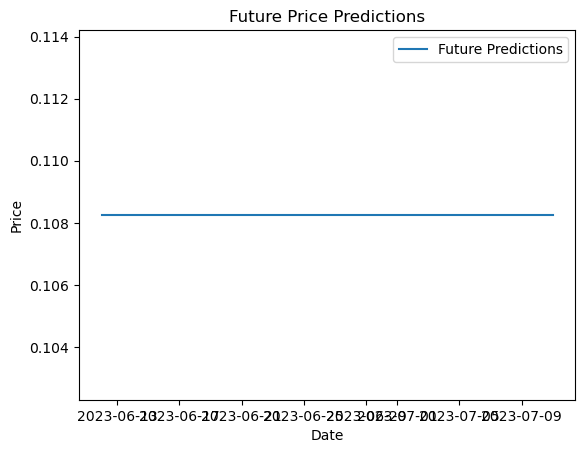

In [29]:
# Step 9: Plot the future predicted prices
plt.plot(future_dates, future_prices, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Future Price Predictions')
plt.show()

In [31]:
# Step 6: Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
print('MSE:', mse)

# Step 7: Print the parameter values of the model
print('Parameter values:')
print('n_estimators:', model.n_estimators)
print('learning_rate:', model.learning_rate)
print('max_depth:', model.max_depth)

RMSE: 0.12307997440829675
MSE: 0.015148680100346982
Parameter values:
n_estimators: 100
learning_rate: 0.1
max_depth: 3


In summary, based on the provided data, you can conclude that the Gradient Boosting model with 100 estimators, a learning rate of 0.1, and a maximum tree depth of 3 performs well, as evidenced by the low RMSE value. However, it's important to consider other factors such as model interpretability, computational resources, and the specific requirements of your prediction task before making a final determination.


Based on the values you provided, here's the meaning of each parameter:

RMSE (Root Mean Squared Error): It is an evaluation metric that measures the average magnitude of the residuals (the differences between the predicted and actual values). In this case, the RMSE value is 0.12307997440829675, indicating the average prediction error of the model.

n_estimators: It refers to the number of individual decision trees in the gradient boosting ensemble. In your case, the model has 100 decision trees (estimators).

learning_rate: It determines the contribution of each tree to the overall prediction. A lower learning rate puts more emphasis on individual trees and may lead to better generalization. In your case, the learning rate is 0.1, indicating a moderate emphasis on individual trees.

max_depth: It represents the maximum depth of each decision tree in the ensemble. A deeper tree can capture more complex patterns but may also lead to overfitting. In your case, the maximum depth is set to 3, indicating a relatively shallow tree structure.

Based on these parameter values, you have a gradient boosting model with 100 decision trees, a learning rate of 0.1, and a maximum tree depth of 3. The RMSE value of 0.12307997440829675 represents the average prediction error of the model on your test data.